# Support Vector Regression

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import median_absolute_error, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../input/Position_Salaries.csv')
data.head(2)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000


In [3]:
x = np.array(data['Level']).reshape(data.shape[0], -1)
y = np.array(data['Salary']).reshape(data.shape[0], -1)

In [4]:
sc_x = StandardScaler()
x = sc_x.fit_transform(x)

sc_y = StandardScaler()
y = sc_y.fit_transform(y)

In [5]:
regressor = SVR()

In [6]:
regressor.fit(x,y)

SVR()

In [7]:
salary_predicted = regressor.predict(x)

In [8]:
mean_absolute_error(data['Salary'], sc_y.inverse_transform(salary_predicted))

63332.392089689674

In [9]:
median_absolute_error(data['Salary'], sc_y.inverse_transform(salary_predicted))

28233.99738529489

Text(0.5, 1.0, 'Position vs Salary')

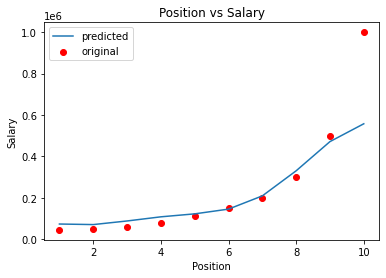

In [10]:
plt.figure()
plt.scatter(data['Level'], data['Salary'], color='red', label='original')
plt.plot(data['Level'], sc_y.inverse_transform(salary_predicted), label='predicted')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.legend()
plt.title('Position vs Salary')

In [11]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])))

array([170370.0204065])

## US data

In [12]:
data = pd.read_csv('../input/us.csv')
data.head(2)

,Day,cases,deaths
0,1,1,0
1,2,1,0


In [13]:
data = data[['cases', 'deaths']]
data.shape

(212, 2)

In [14]:
x = np.array(data['cases']).reshape(data.shape[0], -1)
y = np.array(data['deaths']).reshape(data.shape[0], -1)

In [15]:
x.shape, y.shape

((212, 1), (212, 1))

In [16]:
sc_x = StandardScaler()
x = sc_x.fit_transform(x)

sc_y = StandardScaler()
y = sc_y.fit_transform(y)

In [17]:
regressor = SVR()
regressor.fit(x,y)

SVR()

In [18]:
deaths_predicted = regressor.predict(x)

In [19]:
mean_absolute_error(data['deaths'], sc_y.inverse_transform(deaths_predicted))

4774.849384950869

In [20]:
median_absolute_error(data['deaths'], sc_y.inverse_transform(deaths_predicted))

5215.169067961833

Text(0.5, 1.0, 'Cases vs Deaths')

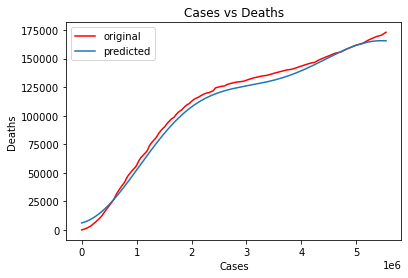

In [21]:
plt.figure()
plt.plot(data['cases'], data['deaths'], color='red', label='original')
plt.plot(data['cases'], sc_y.inverse_transform(deaths_predicted), label='predicted')
plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.legend()
plt.title('Cases vs Deaths')

In [26]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[35000]])))

array([6583.39100973])